# Matter-Antimatter asymmetries at the LHC

## Example program

Author: Dr Marco Gersabeck

Copyright &copy; 2020-23 The University of Manchester

### Overview
This example code follows the structure described in the lab script and depicted in the scheme below.

<img src="LabScheme.png" width="600">

In [16]:
!pip uninstall numpy -y
!pip install numpy==1.22.0

  Using cached numpy-1.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


### Configuration
The cell below imports all required Python modules. If you need more and add them there, make sure to execute this cell again before executing the cell requiring the new module.

In [1]:
import uproot
import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as colors
from scipy.optimize import curve_fit 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
from tqdm import tqdm
from src.invariant_mass import find_invariant_mass
from src.file_reading import read_file


In [2]:
from sklearn.cluster import KMeans

### Input data
This opens input data files and assigns them to variables.

In [3]:
# path = './data/' # set this to '' to run on the GitHub version
# events_sim = uproot.open(path+'PhaseSpaceSimulation.root')
# events_down = uproot.open(path+'B2HHH_MagnetDown.root')
# events_up = uproot.open(path+'B2HHH_MagnetUp.root')

### Select data and calculate derived quantities
The following cell reads the input data. This is where all derived quantities (such as transverse momentum) should be calculated and where selection criteria are applied (such as the z component of the momentum being positive).

In [4]:
# def find_invariant_mass_simulation(momentum_1=[0, 0, 0],
#                                    momentum_2=[0, 0, 0],
#                                    momentum_3=[0, 0, 0],
#                                    mass_array=[493.677, 493.677, 493.677]):
    
#         p1_x, p1_y, p1_z = momentum_1
#         p2_x, p2_y, p2_z = momentum_2
#         p3_x, p3_y, p3_z = momentum_3
    
#         E1 = np.sqrt(np.square(p1_x) + np.square(p1_y) + np.square(p1_z) + np.square(mass_array[0]))
#         E2 = np.sqrt(np.square(p2_x) + np.square(p2_y) + np.square(p2_z) + np.square(mass_array[1]))
#         E3 = np.sqrt(np.square(p3_x) + np.square(p3_y) + np.square(p3_z) + np.square(mass_array[2]))
        
#         energy_squared   = np.square(E1 + E2 + E3)
#         total_momentum_x = p1_x + p2_y + p3_z
#         total_momentum_y = p1_x + p2_y + p3_z
#         total_momenum_z  = p3_x + p3_y + p3_z
#         #total momentum
#         inv_mass_squared = energy_squared - np.square(
#             total_momentum_x) - np.square(total_momentum_y) - np.square(total_momenum_z)

#         return np.sqrt(inv_mass_squared)

In [2]:

pT, pX, pY, pZ, (h1_probpi, h1_probk), (h2_probpi, h2_probk), (h3_probpi, h3_probk), (
    master_probpi, master_probk), invariant_mass_array = read_file(mode=2, MAX_EVENTS=100000, selection=True,
                                                                   interest="B+")


 Selecting B+ events
Input data varaiables: 
Magnet down data
['DecayTree;1']
Varialbes read



100%|██████████| 100000/100000 [00:59<00:00, 1675.20it/s]


Read 100000 events


  0%|          | 0/100000 [00:00<?, ?it/s]

Read 100004 events


### Visualise data
The cell below produces histograms of the data contained in the arrays that were filled in the cell above.

In [5]:
# # Plot some histograms -- NOTE: this can take several minutes

# # This line produces two plots side-by-side. 
# # It's still useful just for one plot as you can set the size and get the fig,ax objects
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
# fig.subplots_adjust(wspace=0.3) # increase horizontal space between plots

# # This plots two 1D-histograms.
# # The color is changed automatically, the styles are set by hand
# # keep hold of the pT histogram data for fitting later
# print('Plotting 1D histogram')
# values_pT,bins_pT,patches_pT = ax[0].hist(pT, bins = 200, range = [0, 100000],histtype='step',label='$p_{T}$')
# ax[0].hist(pZ, bins = 200, range = [0, 100000],histtype='stepfilled',alpha=0.3,label='$p_{z}$')
# ax[0].set_xlabel('Momentum in MeV')
# ax[0].set_ylabel('Entries per 100 MeV')
# ax[0].legend()
# plt.savefig('pTpZ.pdf')

# # This plots a 2D-histogram with values converted to GeV and with a logarithmic colour scale
# print('Plotting 2D histogram')
# h2d = ax[1].hist2d(np.true_divide(pX,1000), np.divide(pY,1000), bins = [100,100], range = [[-10,10],[-10,10]],norm=colors.LogNorm())
# ax[1].set_xlabel('p_{x}')
# ax[1].set_ylabel('p_{y}')
# fig.colorbar(h2d[3],ax=ax[1]) # let's add the colour scale
# plt.savefig('pXpY.pdf')

Plotting 1D histogram
Plotting 2D histogram


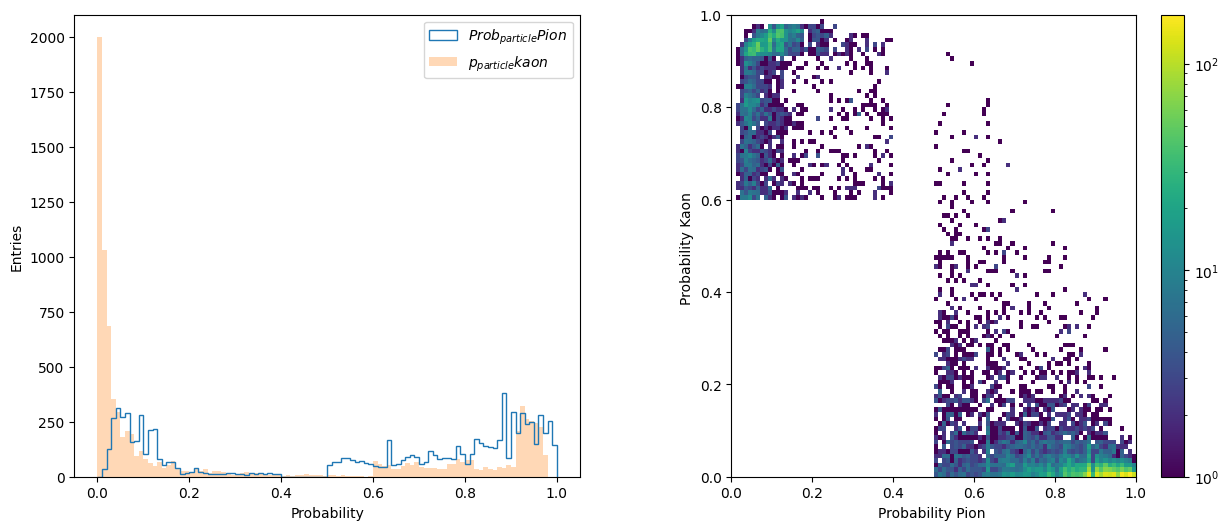

In [4]:
def plotting_histograms_probability(particle=None):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    fig.subplots_adjust(wspace=0.3) # increase horizontal space between plots
    print('Plotting 1D histogram')
    if particle == 1:
        interest_pi = h1_probpi
        interest_k  = h1_probk
    if particle == 2:
        interest_pi = h2_probpi
        interest_k  = h2_probk
    if particle == 3:
        interest_pi = h3_probpi
        interest_k = h3_probk
        
    else:
        interest_pi = master_probpi
        interest_k = master_probk
    values_probpi, bins_probpi, patches_probpi = ax[0].hist(interest_pi, bins=100, range=[0,1], histtype='step', 
                                                             label='$Prob_{particle} Pion$')
    ax[0].hist(interest_k, bins = 100, range = [0, 1],histtype='stepfilled',alpha=0.3,label='$p_{particle} kaon$')
    ax[0].set_xlabel('Probability')
    ax[0].set_ylabel('Entries')
    ax[0].legend()
    
    #plt.savefig(f"Prob Pion vs Kaon Histogram particle{particle}")
    #plt.savefig(f"Prob_kaon_pion_{particle}.pdf")
    
    print('Plotting 2D histogram')
    h2d = ax[1].hist2d(interest_pi, interest_k,
                       bins = [100,100], range = [[0,1],[0,1]],norm=colors.LogNorm())
    ax[1].set_xlabel(f'Probability Pion ')
    ax[1].set_ylabel(f'Probability Kaon ')
    fig.colorbar(h2d[3],ax=ax[1]) # let's add the colour scale
    #plt.savefig(f"Prob_pi_prob_k_{particle}_2d.pdf")
    return values_probpi, bins_probpi, patches_probpi

values_probpi, bins_probpi, patches_probpi = plotting_histograms_probability(particle=
                                                                            None)
    

Plotting 1D histogram
Plotting 2D histogram


(array([  0.,  12.,  40.,  95., 128., 123., 138.,  64.,  73., 157.,  54.,
        124., 136.,  47.,  34.,  39.,  43.,  22.,   7.,   9.,  14.,  22.,
         15.,  13.,   9.,   5.,   8.,   8.,  13.,  16.,  11.,   8.,   3.,
         12.,   7.,  13.,   7.,  10.,   7.,   9.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  21.,  20.,  31.,  36.,  34.,
         25.,  20.,  26.,  23.,  21.,  24.,  12.,  14.,  61.,  15.,  16.,
         23.,  27.,  35.,  24.,  20.,  18.,  36.,  30.,  24.,  25.,  25.,
         28.,  39.,  24.,  14.,  29.,  39.,  32.,  39.,  47.,  37.,  41.,
         91.,  18.,  80.,  46.,  74.,  58.,  44.,  23.,  29.,  12.,  14.,
          4.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

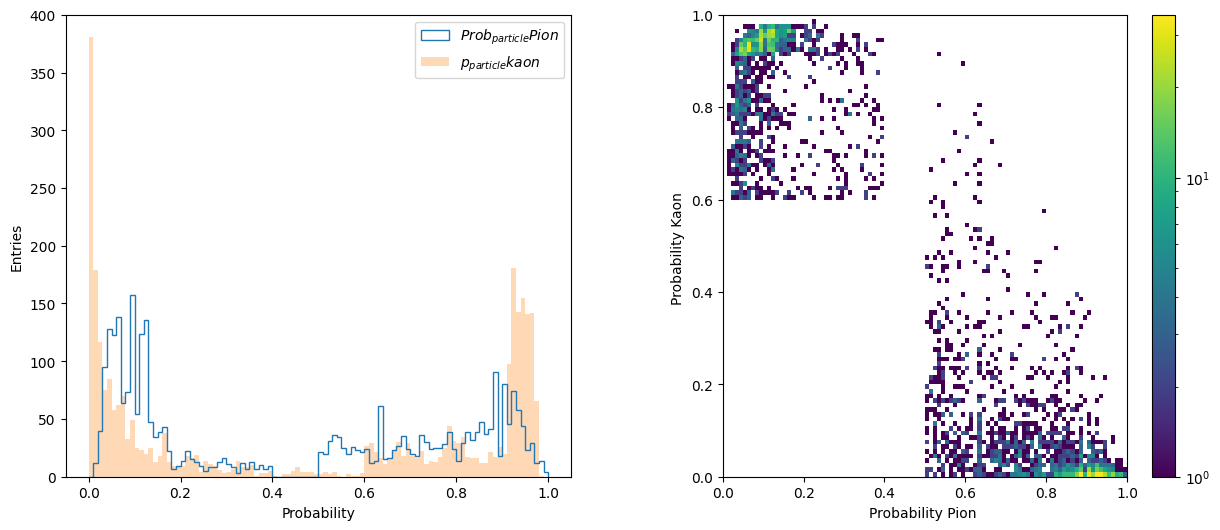

In [6]:
plotting_histograms_probability(3)

In [16]:
print(np.shape(pY))
print(np.shape(h1_probk))
print(np.shape(data[b'H1_ProbPi']))


(3000,)
(1000,)
(44583,)


## Clustering using SKLEARN

In [8]:
print(np.shape(master_probpi))
print(np.shape(master_probk))

master_probpi = np.array(master_probpi).flatten()
master_probk  = np.array(master_probk).flatten()
master_probpi = np.expand_dims(master_probpi, axis=1)
master_probk  = np.expand_dims(master_probk, axis=1)

master_probability = np.concatenate((master_probpi, master_probk), axis=1)
print(np.shape(master_probability))
print(master_probability[0:10])

(9309,)
(9309,)
(9309, 2)
[[0.92053777 0.00323129]
 [0.04420888 0.91634071]
 [0.66185725 0.04362735]
 [0.92221409 0.0079414 ]
 [0.88763165 0.04657483]
 [0.03124425 0.91528034]
 [0.61442143 0.15333825]
 [0.89303851 0.00900921]
 [0.07446939 0.94224238]
 [0.91880119 0.00946528]]


In [9]:
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": [1,2,3,4,5,6],
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(master_probability)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': [1, 2, 3, 4, 5, 6]},
             scoring=<function gmm_bic_score at 0x7f9b72923b80>)

In [7]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

/home/codespace/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

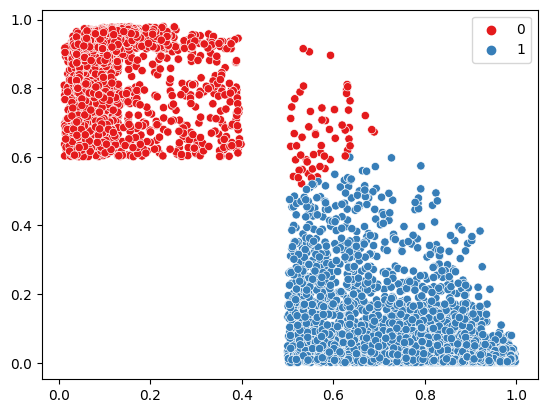

In [11]:
# fit a kmeans clustering model to the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(master_probability)
#plot the clusters

# SEABORN PLOT OF THE CLUSTERS
import seaborn as sns

# plot the clusters using seaborn 
sns.scatterplot(x=master_probability[:,0], y=master_probability[:,1], hue=kmeans.labels_, palette='Set1')

<Axes: >

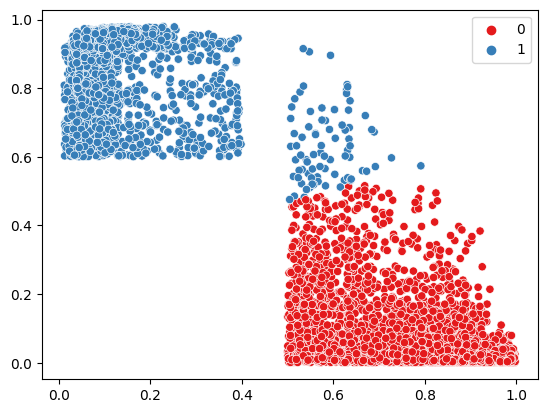

In [13]:
#fit a GMM model to the data using EM algorithm#
gmm = GaussianMixture(n_components=2, covariance_type='tied').fit(master_probability)
#plot the clusters
sns.scatterplot(x=master_probability[:,0], y=master_probability[:,1], hue=gmm.predict(master_probability), palette='Set1')
#plt.scatter(master_probability[:,0], master_probability[:,1], c=gmm.predict(master_probability), cmap='rainbow')

## Finding Invariant Mass


Invariant Mass for a simulated dataset

In [59]:
print(invariant_mass_array)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

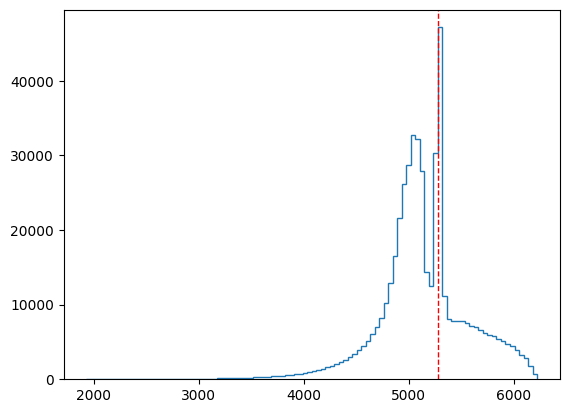

In [9]:
invariant_mass_numpy = np.genfromtxt('/workspaces/labs_yr3/inv_mass.csv', delimiter=',')
plt.hist(invariant_mass_numpy, bins=100,  histtype='step', label='Invariant Mass');
plt.axvline(5279, color='r', linestyle='dashed', linewidth=1);
#values, bins, patches = plt.hist(invariant_mass_array, bins=100,  histtype='step', label='Invariant Mass');

### Fitting data

The following code shows how to fit a function to a dataset. The fit function is a sum of two functions, which can be extended to more complex functions. The output includes a chi2 calculation and plotting and saving of the resulting histogram.

NameError: name 'bins_probpi' is not defined

In [7]:
# # decaying exponential function
# def exponential(x, norm, decay):
#     xoffset = 0 # this is a technical parameter, which can be used to move the position at which the function evaluates to "norm"
#     return np.array( norm * np.exp(-(x-xoffset)/decay) )

# # constant function
# def constant(x, norm):
#     return np.array( norm )

# # fit function combining two individual functions
# def fit_function(x, norm, normE, decay):
#     return np.array( constant(x, norm) + exponential(x, normE, decay) )

# def fit_data(bins, values, minX, maxX, p0):
#     # determine bin centres
#     bin_centres = [(a+b)/2 for a,b in zip(bins[0:-1],bins[1:]) ] # uses simultaneous loop over two arrays
#     print(bin_centres)
#     # reduce range to fit only part of curve
#     bin_centres_red = [] 
#     values_red = []
#     for c,v in zip(bin_centres,values):
#         if c < minX or c > maxX: continue
#         bin_centres_red.append(c)
#         values_red.append(v)
#     print(bin_centres_red)
#     # execute the fit with starting values as given in p0
#     coeff_fit,cov_fit = curve_fit(fit_function,bin_centres_red,values_red,p0) # fit
    
#     # evaluate chi2
#     fit_vals = [fit_function(x,coeff_fit[0],coeff_fit[1],coeff_fit[2]) for x in bin_centres_red]
#     chi2parts = np.array( ( np.divide( np.array(values_red) - np.array(fit_vals), np.sqrt( values_red ), 
#                                       out = np.array(values_red), where = np.array(values_red) != 0 ) )**2 )
#     chi2 = np.sum( chi2parts )
    
#     return coeff_fit,cov_fit, bin_centres, bin_centres_red, chi2, len(chi2parts)

# def print_results(coeff,cov,chi2,ndf):
#     perr = np.sqrt(np.diag(cov)) # extract errors from covarianve matrix
#     # output fit results
#     print('Fit results with chi2/ndf', chi2,'/',ndf)
#     parcount = 0
#     for p,e in zip(coeff,perr):
#         parcount += 1
#         print('Par {:d}: {:f} +/- {:f}'.format(parcount,p,e))

# def plot_results(a,bin_centres,bin_centres_red,values,coeff_fit,fname):
#     # plot the data, this time as dots with error bars (sqrt(N) errors)
#     a.errorbar(bin_centres,values,yerr=np.sqrt(values),linestyle='',marker='.',
#                markerfacecolor='k',markeredgecolor='k',ecolor='k',label='Data')

#     # plot the fit: create x values, then calculate the corresponding y values and plot
#     x_fit = np.linspace(bin_centres_red[0],bin_centres_red[-1],100)
#     y_fit = fit_function(x_fit,coeff_fit[0],coeff_fit[1],coeff_fit[2])
#     a.plot(x_fit,y_fit,label='Fit',color='r',zorder=10) # zorder makes sure the fit line is on top

#     # plot decoration
#     a.legend()
#     a.set_xlabel('$m_{inv}$ in MeV')
#     a.set_ylabel('Entries per 2 MeV')
#     plt.savefig(fname)


# coeff_pT,cov_pT, bin_centres_pT, bin_centres_red_pT, chi2_pT, ndf_pT = fit_data( bins, values, 5100, 6500, [10,100,5000] )
# # values_probpi, bins_probpi, patches_probpi = plotting_histograms_probability(particle=
# #                                                                             None)
# print_results(coeff_pT,cov_pT, chi2_pT, ndf_pT)

# # plot results
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
# plot_results(ax,bin_centres_pT,bin_centres_red_pT,values_probpi,coeff_pT,'fit_pT.pdf')

/home/codespace/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


NameError: name 'y_plot_4' is not defined

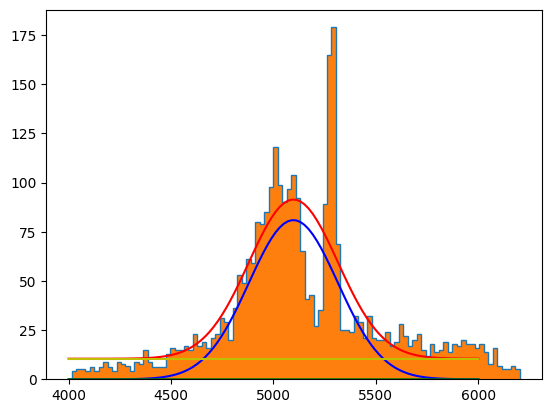

In [3]:
#get a sub invariant mass list that is between 5100 and 6500 MeV using numpy
#invariant_mass_numpy = np.array(invariant_mass_array)
#set sed
np.random.seed(0)
# read in a csv file with the invariant mass
#invariant_mass_numpy = np.genfromtxt('/workspaces/labs_yr3/inv_mass.csv', delimiter=',')
invariant_mass_numpy = np.array(invariant_mass_array)
#remove indices where the invariant mass is not between 5100 and 6500 MeV
invariant_mass_numpy = np.where((invariant_mass_numpy > 4000) & (invariant_mass_numpy < 6500), invariant_mass_numpy, np.nan)
np.shape(invariant_mass_numpy)
plt.hist(invariant_mass_numpy, bins=100,  histtype='step', label='Invariant Mass');
#get bin centers and values
values, bins, patches = plt.hist(invariant_mass_numpy, bins=100)

#fit a gaussian to the dataset 
def gaussian(x, norm, mean, sigma):
    return np.array( norm * np.exp( -0.5 * ( (x-mean)/sigma )**2 ) )
def exponential(x, norm, decay):
    xoffset = 0 # this is a technical parameter, which can be used to move the position at which the function evaluates to "norm"
    return np.array( norm * np.exp(-(x-xoffset)/decay) )
def constant(x, norm):
    return np.array( norm * np.ones(len(x)) )
def fit_func(x, norm, mean, sigma):
    return np.array( gaussian(x, norm, mean, sigma) )
def fit_func_triple(x, norm1, mean1, sigma1, norm2, mean2, sigma2, normE, decayE):
    return np.array(gaussian(x, norm1, mean1, sigma1) + gaussian(x, norm2, mean2, sigma2)  + exponential(x, normE, decayE))

def fit_func_quad(x, norm1, mean1, sigma1, norm2, mean2, sigma2, normE, decayE, constant):
    return np.array(gaussian(x, norm1, mean1, sigma1) + gaussian(x, norm2, mean2, sigma2) + exponential(x, normE, decayE) + constant(x, constant))

    

def get_bins(data, values):
    
    bin_centers = [(a+b)/2 for a,b in zip(data[0:-1],data[1:]) ]

    return bin_centers

x_data = np.linspace(4000, 6000, 100)


#popt, pcov = curve_fit(fit_func, get_bins(bins, values), values, p0=[100, 5300, 10])
#y_data = gaussian(x_data, popt[0], popt[1], popt[2])

# mixture model
popt, pcov = curve_fit(fit_func_triple, get_bins(bins, values), values, 
                        p0 = [100, 5000, 4, 100, 5200, 5, 10, 1000 ])
y_data = fit_func_triple(x_data, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7])

y_plot_1 = gaussian(x_data, popt[0], popt[1], popt[2])
y_plot_2 = gaussian(x_data, popt[3], popt[4], popt[5])
y_plot_3 = exponential(x_data, popt[6], popt[7])
#plot the data

#popt, pcov = curve_fit(fit_func_quad, get_bins(bins, values), values,
#                        p0 = [100, 5000, 4, 100, 5200, 5, 10, 1000, 1000])
#y_data = fit_func_quad(x_data, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7], popt[8], popt[9])
# y_plot_1 = gaussian(x_data, popt[0], popt[1], popt[2])
# y_plot_2 = gaussian(x_data, popt[3], popt[4], popt[5])
# y_plot_3 = exponential(x_data, popt[6], popt[7])
# y_plot_4 = constant(x_data, popt[8], popt[9])






plt.plot(x_data, y_data, 'r-', label='fit')
plt.plot(x_data, y_plot_1, 'b-', label='fit')
plt.plot(x_data, y_plot_2, 'g-', label='fit')
plt.plot(x_data, y_plot_3, 'y-', label='fit')
plt.plot(x_data, y_plot_4, 'k-', label='fit')

#find the mean and standard deviation of the gaussian fit
mean = popt[1]
std = popt[2]

print('mean = ', mean)
print('std = ', std)


chi2 = np.sum(((values - gaussian(get_bins(bins, values), popt[0], popt[1], popt[2]))/np.sqrt(values))**2)
ndf = len(values) - 3

print('chi2 = ', chi2)
print('ndf = ', ndf)

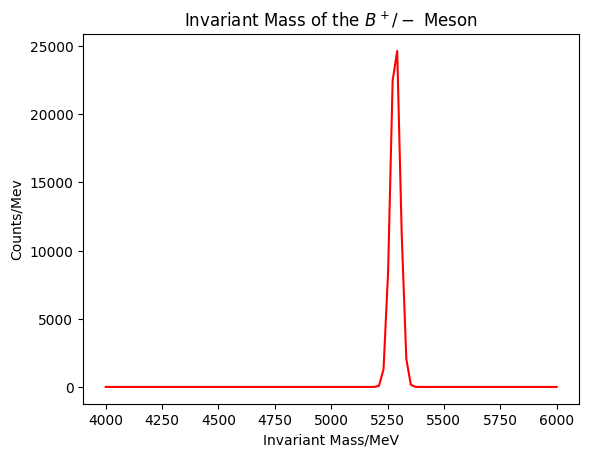

In [21]:
def clean_data(y_data, y_other):

    for y_indivual in y_other:
        y_data = y_data - y_indivual
    
    return y_data

y_signal = clean_data(y_data,[y_plot_1, y_plot_3])

plt.xlabel('Invariant Mass/MeV')
plt.ylabel('Counts/Mev')
plt.title('Invariant Mass of the $B^+/-$ Meson')
plt.plot(x_data, y_signal, 'r-', label='fit')

In [31]:
def area_under_curve(x_data, y_data):
    area = np.trapz(y_data, x_data)
    #find area using monte carlo method
    
    return area
#find area under a histogram using monte carlo method
def area_monte(x_data, y_data):
    return 0

area = area_under_curve(x_data, y_signal)
print(f"The area under the curve is {area:g} which is the count rate of the signal.")

The area under the curve is 1.41799e+06 which is the count rate of the signal.


In [35]:
#find the ratio of the signal to the background
ratio = area/np.sqrt(area_under_curve(x_data, y_data) + area)
print('ratio = ', ratio)


ratio =  412.2685665708248


In [42]:
# #fit a gaussian mixture model to the invariant mass data
# def fit_data(bins,values,low,high,guess):
#     # get the bin centres
#     bin_centres = [(a+b)/2 for a,b in zip(bins[0:-1],bins[1:]) ]
#     # get the bin centres in the range we want to fit
#     bin_centres_red = [x for x in bin_centres if x > low and x < high]
#     # get the values in the range we want to fit
#     values_red = [x for x,y in zip(values,bin_centres) if y > low and y < high]
#     # fit the data
#     coeff_fit, cov_fit = curve_fit(fit_function,bin_centres_red,values_red,p0=guess)
#     # calculate chi2
#     chi2 = np.sum(((values_red - fit_function(bin_centres_red,coeff_fit[0],coeff_fit[1],coeff_fit[2]))/np.sqrt(values_red))**2)
#     # calculate ndf
#     ndf = len(values_red) - 3
#     return coeff_fit, cov_fit, bin_centres, bin_centres_red, chi2, ndf

# def print_results(coeff,cov,chi2,ndf):
#     print('chi2 = ', chi2)
#     print('ndf = ', ndf)
#     print('chi2/ndf = ', chi2/ndf)
#     print('norm = ', coeff[0])
#     print('mean = ', coeff[1])
#     print('std = ', coeff[2])
#     print('cov = ', cov)

# def plot_results(ax,bin_centres,bin_centres_red,values,coeff,filename):
#     ax.hist(bin_centres, bins=100, weights=values, histtype='step', label='Invariant Mass');
#     ax.plot(bin_centres_red, fit_function(bin_centres_red,coeff[0],coeff[1],coeff[2]), 'r-', label='fit')
#     ax.set_xlabel('Invariant Mass [MeV]')
#     ax.set_ylabel('Counts')
#     ax.legend()
#     plt.savefig(filename)


### Manipulation of 2D histograms

The following is an example code to demonstrate manipulation of the content of 2D histograms. It first produces two dummy histograms before working out the bin centres, subtracting the histogram contents, and finally plotting. The subtraction bit can of course be replaced by more complex operations as well.

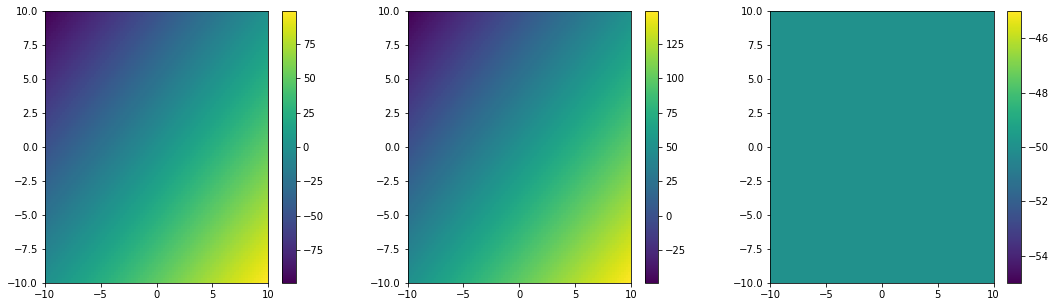

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.subplots_adjust(wspace=0.3) # increase horizontal space between plots

### ignore this bit and replace by however you produce your two 2D histograms to be subtracted ###
xvalues = []
yvalues = []
weights1 = []
weights2 = []
for x in range(100):
    for y in range(100):
        xvalues.append(-10+x/5.+0.1) # bin centre for x
        yvalues.append(-10+y/5.+0.1) # bin centre for y
        weights1.append((x-y))       # weights for histo1, this would be filled automatically
        weights2.append((x-y)+50)    # weights for histo2
h2d1 = ax[0].hist2d(xvalues,yvalues,weights=weights1,bins = [100,100], range = [[-10,10],[-10,10]])        
h2d2 = ax[1].hist2d(xvalues,yvalues,weights=weights2,bins = [100,100], range = [[-10,10],[-10,10]])
### end ignoring here :) ###

# first calculate the bin centres from the bin boundaries of the hist2d object
xcentres = []
ycentres = []
for a,b in zip(h2d1[1][0:-1],h2d1[1][1:]):
    for c,d in zip(h2d1[2][0:-1],h2d1[2][1:]):
        xcentres.append( (a+b)/2 )
        ycentres.append( (c+d)/2 )

# now extract the weights, that is the bin contents
w1 = (np.array(h2d1[0])).flatten()
w2 = (np.array(h2d2[0])).flatten()
wsub = np.subtract(w1,w2) # subtract bin content of two histograms

# produce the new histogram
h2d3 = ax[2].hist2d(xcentres,ycentres,weights=wsub, bins = [h2d1[1],h2d1[2]]) # recycle the binning from above

# plot the lot
fig.colorbar(h2d1[3],ax=ax[0]) # let's add the colour scale for histo 1
fig.colorbar(h2d2[3],ax=ax[1]) # let's add the colour scale for histo 2
fig.colorbar(h2d3[3],ax=ax[2]) # let's add the colour scale for histo 3